# Part 8 - NLP Analysis of Reviews

## ✅ To Do:


- [ ] Move notebook functions to project_functions.py
- [ ] Add NLP EDA by
    - ...Rating?
    - Profit?
- [ ] 

# Analysis

In [1]:
import tensorflow as tf
import numpy as np

# Then Set Random Seeds
tf.keras.utils.set_random_seed(42)
tf.random.set_seed(42)
np.random.seed(42)

# Then run the Enable Deterministic Operations Function
tf.config.experimental.enable_op_determinism()

# Source: https://discuss.tensorflow.org/t/upgrading-os-to-sonoma-on-my-mac-causing-tensorflow-errors/19846/5
tf.config.set_visible_devices([], 'GPU')

from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import layers
from tensorflow.keras import optimizers

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from pprint import pprint
from sklearn import set_config
set_config(transform_output='pandas')

pd.set_option('display.max_colwidth', 250)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno

pd.set_option('display.max_columns',100)


import nltk
import wordcloud
import gzip, json

import matplotlib.pyplot as plt
import seaborn as sns
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import (CountVectorizer,TfidfTransformer, 
                                             TfidfVectorizer,ENGLISH_STOP_WORDS)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import nltk 
from nltk import TweetTokenizer, word_tokenize,wordpunct_tokenize
import string
from wordcloud import WordCloud



from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## #NOT THE MOST RECENT VERSIONS!!!!
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict


def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict





# def get_ngram_measures_finder(tokens=None,docs=None, ngrams=2, verbose=False,
#                               get_scores_df=False, measure='raw_freq', top_n=None,
#                              words_colname='Words'):
#     import nltk
#     if ngrams == 4:
#         MeasuresClass = nltk.collocations.QuadgramAssocMeasures
#         FinderClass = nltk.collocations.QuadgramCollocationFinder
        
#     elif ngrams == 3: 
#         MeasuresClass = nltk.collocations.TrigramAssocMeasures
#         FinderClass = nltk.collocations.TrigramCollocationFinder
#     else:
#         MeasuresClass = nltk.collocations.BigramAssocMeasures
#         FinderClass = nltk.collocations.BigramCollocationFinder

#     measures = MeasuresClass()
    
#     if (tokens is not None):
#         finder = FinderClass.from_words(tokens)
#     elif (docs is not None):
#         finder = FinderClass.from_docs(docs)
#     else:
#         raise Exception("Must provide tokens or docs")
        

#     if get_scores_df == False:
#         return measures, finder
#     else:
#         df_ngrams = get_score_df(measures, finder, measure=measure, top_n=top_n, words_colname=words_colname)
#         return df_ngrams




# def get_score_df( measures,finder, measure='raw_freq', top_n=None, words_colname="Words"):
#     import pandas as pd
#     if measure=='pmi':
#         scored_ngrams = finder.score_ngrams(measures.pmi)
#     else:
#         measure='raw_freq'
#         scored_ngrams = finder.score_ngrams(measures.raw_freq)

#     df_ngrams = pd.DataFrame(scored_ngrams, columns=[words_colname, measure.replace("_",' ').title()])
#     if top_n is not None:
#         return df_ngrams.head(top_n)
#     else:
#         return df_ngrams

import pandas as pd
def get_ngram_measures_finder(tokens, ngrams=2, get_scores_df=False, measure='raw_freq', top_n=None, min_freq = 1,
                             words_colname='Words'):
    import nltk
    if ngrams == 4:
        MeasuresClass = nltk.collocations.QuadgramAssocMeasures
        FinderClass = nltk.collocations.QuadgramCollocationFinder
        
    elif ngrams == 3: 
        MeasuresClass = nltk.collocations.TrigramAssocMeasures
        FinderClass = nltk.collocations.TrigramCollocationFinder
    else:
        MeasuresClass = nltk.collocations.BigramAssocMeasures
        FinderClass = nltk.collocations.BigramCollocationFinder

    measures = MeasuresClass()
    
   
    finder = FinderClass.from_words(tokens)
    finder.apply_freq_filter(min_freq)
    if measure=='pmi':
        scored_ngrams = finder.score_ngrams(measures.pmi)
    else:
        measure='raw_freq'
        scored_ngrams = finder.score_ngrams(measures.raw_freq)

    df_ngrams = pd.DataFrame(scored_ngrams, columns=[words_colname, measure.replace("_",' ').title()])
    if top_n is not None:
        return df_ngrams.head(top_n)
    else:
        return df_ngrams



from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False,values_format=".2f"):
    """Classification metrics function from Intro to Machine Learning"""
    # Get the classification report
    report = classification_report(y_true, y_pred)
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    
    # create a confusion matrix  of raw counts
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray_r', values_format="d", colorbar=colorbar,
                ax = axes[0],);
    axes[0].set_title("Raw Counts")
    
    # create a confusion matrix with the test data
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, values_format=values_format, colorbar=colorbar,
                ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict

    

def preprocess_text(txt, nlp=None, remove_stopwords=True, remove_punct=True, use_lemmas=False,):
	"""Preprocess text into tokens/lemmas. 

	Args:
		txt (string): text to process
		nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None
  									if None, it creates a default 'en_core_web_sm' pipe.
		remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
		remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
		use_lemmas (bool, optional): lemmatize tokens. Defaults to False.

	Returns:
		list: list of tokens/lemmas
	"""
	if nlp is None:
		nlp = spacy.load('en_core_web_sm')

	doc = nlp(txt)

	# Saving list of the token objects for stopwords and punctuation removal
	tokens = []

	for token in doc:
		# Check if should remove stopwords and if token is stopword
		if (remove_stopwords == True) & (token.is_stop == True):
			# Continue the loop with the next token
			continue
	
		# Check if should remove punctuation and if token is punctuation
		if (remove_punct == True) & (token.is_punct == True):
			# Continue the loop with the next oken
			continue

		# Check if should remove punctuation and if token is a space
		if (remove_punct == True) & (token.is_space == True):
			# Continue the loop with the next oken
			continue
	
		# Determine final form of output list of tokens/lemmas
		if use_lemmas:
			tokens.append(token.lemma_)
		else:
			tokens.append(token.text.lower())

	return tokens




def get_true_pred_labels(model,ds):
    """Gets the labels and predicted probabilities from a Tensorflow model and Dataset object.
    Adapted from source: https://stackoverflow.com/questions/66386561/keras-classification-report-accuracy-is-different-between-model-predict-accurac
    """
    y_true = []
    y_pred_probs = []
    
    # Loop through the dataset as a numpy iterator
    for images, labels in ds.as_numpy_iterator():
        
        # Get prediction with batch_size=1
        y_probs = model.predict(images, batch_size=1, verbose=0)

        # Combine previous labels/preds with new labels/preds
        y_true.extend(labels)
        y_pred_probs.extend(y_probs)

    ## Convert the lists to arrays
    y_true = np.array(y_true)
    y_pred_probs = np.array(y_pred_probs)
    
    return y_true, y_pred_probs
    

def convert_y_to_sklearn_classes(y, verbose=False):
    # If already one-dimension
    if np.ndim(y)==1:
        if verbose:
            print("- y is 1D, using it as-is.")
        return y
        
    # If 2 dimensions with more than 1 column:
    elif y.shape[1]>1:
        if verbose:
            print("- y has is 2D with >1 column. Using argmax for metrics.")   
        return np.argmax(y, axis=1)
    
    else:
        if verbose:
            print("y has 2D with 1 column. Using round for metrics.")
        return np.round(y).flatten().astype(int)


def evaluate_classification_network(model, 
                                    X_train=None, y_train=None, 
                                    X_test=None, y_test=None,
                                    history=None, history_figsize=(6,6),
                                    figsize=(6,4), normalize='true',
                                    output_dict = False,
                                    cmap_train='Blues',
                                    cmap_test="Reds",
                                    values_format=".2f", 
                                    colorbar=False):
    """Evaluates a neural network classification task using either
    separate X and y arrays or a tensorflow Dataset
    
    Data Args:
        X_train (array, or Dataset)
        y_train (array, or None if using a Dataset
        X_test (array, or Dataset)
        y_test (array, or None if using a Dataset)
        history (history object)
        """
    # Plot history, if provided
    if history is not None:
        plot_history(history, figsize=history_figsize)

    ## Adding a Print Header
    print("\n"+'='*80)
    print('- Evaluating Network...')
    print('='*80)

    
    ## TRAINING DATA EVALUATION
    # check if X_train was provided
    if X_train is not None:
        ## Check if X_train is a dataset
        if hasattr(X_train,'map'):
            # If it IS a Datset:
            # extract y_train and y_train_pred with helper function
            y_train, y_train_pred = get_true_pred_labels(model, X_train)
        else:
            # Get predictions for training data
            y_train_pred = model.predict(X_train)

        ## Pass both y-vars through helper compatibility function
        y_train = convert_y_to_sklearn_classes(y_train)
        y_train_pred = convert_y_to_sklearn_classes(y_train_pred)
        
        # Call the helper function to obtain regression metrics for training data
        results_train = classification_metrics(y_train, y_train_pred, 
                                         output_dict=True, figsize=figsize,
                                             colorbar=colorbar, cmap=cmap_train,
                                               values_format=values_format,
                                         label='Training Data')
        
        ## Run model.evaluate         
        print("\n- Evaluating Training Data:")
        print(model.evaluate(X_train, return_dict=True))
    
    # If no X_train, then save empty list for results_train
    else:
        results_train = []


    ## TEST DATA EVALUATION
    # check if X_test was provided
    if X_test is not None:
        ## Check if X_train is a dataset
        if hasattr(X_test,'map'):
            # If it IS a Datset:
            # extract y_train and y_train_pred with helper function
            y_test, y_test_pred = get_true_pred_labels(model, X_test)
        else:
            # Get predictions for training data
            y_test_pred = model.predict(X_test)

        ## Pass both y-vars through helper compatibility function
        y_test = convert_y_to_sklearn_classes(y_test)
        y_test_pred = convert_y_to_sklearn_classes(y_test_pred)
        
        # Call the helper function to obtain regression metrics for training data
        results_test = classification_metrics(y_test, y_test_pred, 
                                         output_dict=True, figsize=figsize,
                                             colorbar=colorbar, cmap=cmap_test,
                                              values_format=values_format,
                                         label='Test Data')
        
        ## Run model.evaluate         
        print("\n- Evaluating Test Data:")
        print(model.evaluate(X_test, return_dict=True))
      
    # If no X_test, then save empty list for results_test
    else:
        results_test = []
      

    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict





def get_true_pred_labels(model, ds):
    """Gets the labels and predicted probabilities from a Tensorflow model and Dataset object.
    Adapted from source: https://stackoverflow.com/questions/66386561/keras-classification-report-accuracy-is-different-between-model-predict-accurac
    """
    y_true = []
    y_pred_probs = []

    # Loop through the dataset as a numpy iterator
    for images, labels in ds.as_numpy_iterator():
        # Get prediction with batch_size=1
        y_probs = model.predict(images, batch_size=1, verbose=0)

        # Combine previous labels/preds with new labels/preds
        y_true.extend(labels)
        y_pred_probs.extend(y_probs)

    ## Convert the lists to arrays
    y_true = np.array(y_true)
    y_pred_probs = np.array(y_pred_probs)

    return y_true, y_pred_probs


def convert_y_to_sklearn_classes(y, verbose=False):
    # If already one-dimension
    if np.ndim(y) == 1:
        if verbose:
            print("- y is 1D, using it as-is.")
        return y

    # If 2 dimensions with more than 1 column:
    elif y.shape[1] > 1:
        if verbose:
            print("- y has is 2D with >1 column. Using argmax for metrics.")
        return np.argmax(y, axis=1)

    else:
        if verbose:
            print("y has 2D with 1 column. Using round for metrics.")
        return np.round(y).flatten().astype(int)


import numpy as np
import pandas as pd
from IPython.display import display


## Update to add option to save  (
# or just return the plot and have the evaluate_classification_network function
# do the saving)
def plot_history(history, figsize=(6, 8)):
    import numpy as np
    import matplotlib.pyplot as plt
    # Get a unique list of metrics
    all_metrics = np.unique([k.replace("val_", "") for k in history.history.keys()])

    # Plot each metric
    n_plots = len(all_metrics)
    fig, axes = plt.subplots(nrows=n_plots, figsize=figsize)
    axes = axes.flatten()

    # Loop through metric names add get an index for the axes
    for i, metric in enumerate(all_metrics):
        # Get the epochs and metric values
        epochs = history.epoch
        score = history.history[metric]

        # Plot the training results
        axes[i].plot(epochs, score, label=metric, marker=".")
        # Plot val results (if they exist)
        try:
            val_score = history.history[f"val_{metric}"]
            axes[i].plot(epochs, val_score, label=f"val_{metric}", marker=".")
        except:
            pass

        finally:
            axes[i].legend()
            axes[i].set(title=metric, xlabel="Epoch", ylabel=metric)

    # Adjust subplots and show
    fig.tight_layout()
    plt.show()
    return fig



## Load Data

In [3]:
df = pd.read_csv("Data-NLP/tmdb-movie-reviews.csv.gz") 
df

,movie_id,review_id,author_rating,review_text,created_at
0,843,64ecc16e83901800af821d50,7.0,"This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into a new building. One a newspaper man with his wife,...",2023-08-28 15:46:55.026000+00:00
1,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",2016-04-09 02:59:01.116000+00:00
2,7443,5bb5ac829251410dcb00810c,6.0,"Made my roommate who hates stop-motion animation watched this in 2018 and even he had a good time. It's maybe not as great as I remember thinking it was when I was a little kid, but it still holds up to some degree.\r\n\r\n_Final rating:★★★ - I l...",2018-10-04 06:00:34.227000+00:00
3,7443,5f0c53a013a32000357ec505,8.0,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came out in 2000. Despite a pretty simple feel to the fi...",2020-07-13 12:29:20.853000+00:00
4,7443,64ecc027594c9400ffe77c91,7.0,"Ok, there is an huge temptation to riddle this review with puns - but I'm just going to say it's a cracking little family adventure. It's seemingly based on a whole range of classic movies from the ""Great Escape"", ""Star Trek"" to ""Love Story"" with...",2023-08-28 15:41:27.525000+00:00
...,...,...,...,...,...
7605,453395,631fa2995684630083cd4c4e,NaN,"Cool!\r\n\r\nWish it had a bit more finesse in it he way it handles its themes and structure, but I had a lot of fun. I’m a big fan of Sam Rami’s past work and the stylistic flourishes (seemingly) brought on by his involvement were definitely wel...",2022-09-12 21:20:25.209000+00:00
7606,453395,631fa2e2b87aec007f89f1cd,NaN,"I loved it even more on a second go-around; I'm a sucker for Raimi’s little flourishes. Adore the cinematography and how personally compelling the character-work is. Also, realizing that this may be my favorite work from Cumberbatch, he is really...",2022-09-12 21:21:38.846000+00:00
7607,453395,6363785bd75bd6007e7212f5,9.0,I really like Doctor Strange and i really liked the first Doctor Strange movie. So of course I was worried that Marvel being Marvel would screw this one up with their usual woke nonsense or just a substandard Hollywood writer hack script as they ...,2022-11-03 08:14:19.888000+00:00
7608,453395,63bcc746a6e2d200db5b4747,1.0,"Man all the people that went into this to watch a Doctor Strange movie are going to be angry aren't they?\r\n\r\nThis isn't about Doctor Strange, well, it is if you make Doctor Strange into a bumbling idiot. This is about Woke Captain America, A...",2023-01-10 02:02:46.884000+00:00


<Axes: >

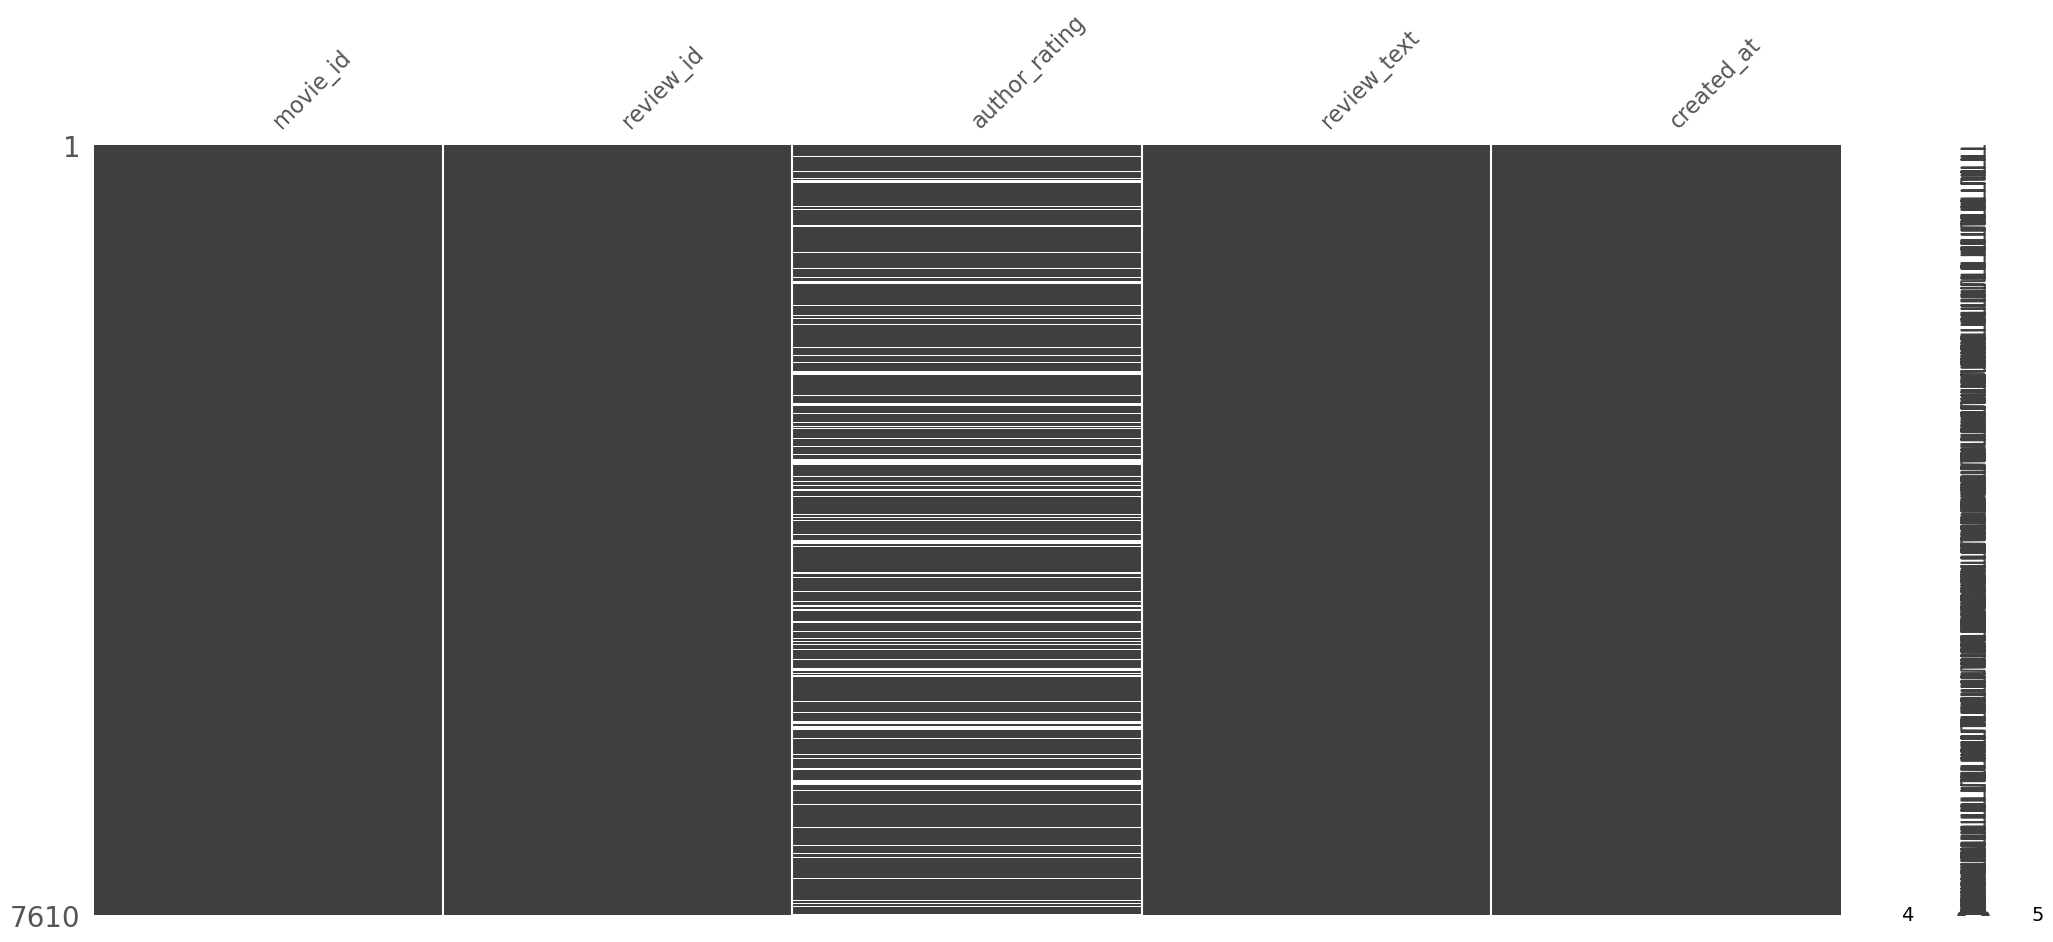

In [4]:
import missingno 
missingno.matrix(df)

In [5]:
df = df.dropna(subset=['author_rating'])
df

,movie_id,review_id,author_rating,review_text,created_at
0,843,64ecc16e83901800af821d50,7.0,"This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into a new building. One a newspaper man with his wife,...",2023-08-28 15:46:55.026000+00:00
1,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",2016-04-09 02:59:01.116000+00:00
2,7443,5bb5ac829251410dcb00810c,6.0,"Made my roommate who hates stop-motion animation watched this in 2018 and even he had a good time. It's maybe not as great as I remember thinking it was when I was a little kid, but it still holds up to some degree.\r\n\r\n_Final rating:★★★ - I l...",2018-10-04 06:00:34.227000+00:00
3,7443,5f0c53a013a32000357ec505,8.0,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came out in 2000. Despite a pretty simple feel to the fi...",2020-07-13 12:29:20.853000+00:00
4,7443,64ecc027594c9400ffe77c91,7.0,"Ok, there is an huge temptation to riddle this review with puns - but I'm just going to say it's a cracking little family adventure. It's seemingly based on a whole range of classic movies from the ""Great Escape"", ""Star Trek"" to ""Love Story"" with...",2023-08-28 15:41:27.525000+00:00
...,...,...,...,...,...
7602,453395,62d04dc56d9fe809442a19cc,1.0,"First of all, let me say that I enjoyed the first Doctor Strange along with many other projects Benedict was involved in, but this one removed all the sanity and introduced horrific and woke garbage that simply destroyed this movie for me. Someho...",2022-07-14 17:09:25.916000+00:00
7604,453395,6300298f3af929008257e428,7.0,"**Pretty good but filled with missed opportunities.**\r\n\r\nA Marvel movie so different than the rest... while still just like the rest. With the introduction of the Multiverse, this movie took full advantage of the opportunity to explore new wo...",2022-08-20 00:23:43.314000+00:00
7607,453395,6363785bd75bd6007e7212f5,9.0,I really like Doctor Strange and i really liked the first Doctor Strange movie. So of course I was worried that Marvel being Marvel would screw this one up with their usual woke nonsense or just a substandard Hollywood writer hack script as they ...,2022-11-03 08:14:19.888000+00:00
7608,453395,63bcc746a6e2d200db5b4747,1.0,"Man all the people that went into this to watch a Doctor Strange movie are going to be angry aren't they?\r\n\r\nThis isn't about Doctor Strange, well, it is if you make Doctor Strange into a bumbling idiot. This is about Woke Captain America, A...",2023-01-10 02:02:46.884000+00:00


In [6]:
df['author_rating'].value_counts(dropna=False)

7.0     1347
6.0     1186
8.0     1132
5.0      638
9.0      549
10.0     507
4.0      447
1.0      235
3.0      224
2.0      130
7.5       27
8.5       23
6.5       22
9.5       15
0.5        9
5.5        6
3.5        4
1.5        3
4.5        3
2.5        2
Name: author_rating, dtype: int64

<Axes: xlabel='author_rating', ylabel='Count'>

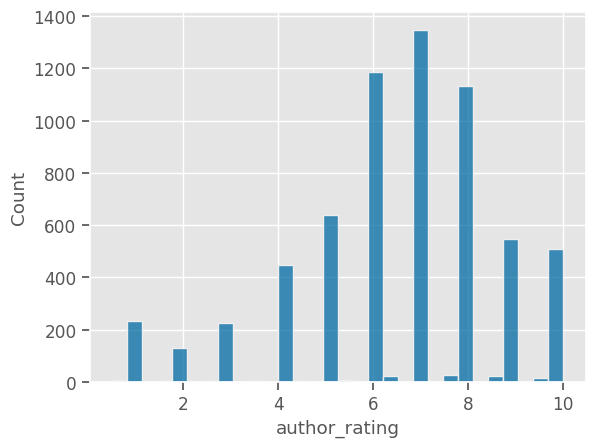

In [7]:
sns.histplot(df['author_rating'])

In [8]:
df['author_rating'].describe()

count    6509.000000
mean        6.531725
std         2.156635
min         0.500000
25%         5.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: author_rating, dtype: float64

### Set the Target

In [9]:
target_bins = pd.cut(df['author_rating'], bins = [0,5,7,10], labels=['Bad','OK','Great'])

target_bins.value_counts(1)

OK       0.393455
Great    0.346136
Bad      0.260409
Name: author_rating, dtype: float64

In [10]:
df['target'] = target_bins.copy()

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_10540/3732698082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = target_bins.copy()


In [11]:
## TO MAKE A BINARY TASK
df['target'] = df['target'].replace('OK',None)
df = df.dropna(subset=['target'])

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_10540/2706313705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].replace('OK',None)


In [12]:
# df = df.copy()

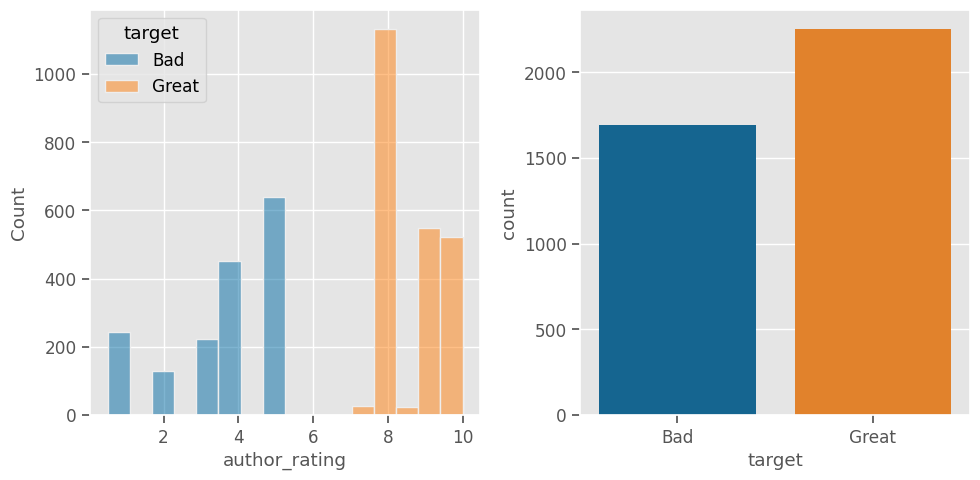

In [13]:
fig, axes =  plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(data=df, x='author_rating', hue='target', ax=axes[0])
sns.countplot(data=df, x='target', ax=axes[1])
fig.tight_layout()

In [14]:
# pd.cut(df['author_rating'] ,bins=3).value_counts(1)

In [15]:
df['length'] = df['review_text'].map(lambda x: len(x.split()))
df.info()
df.head()

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_10540/3440419686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['review_text'].map(lambda x: len(x.split()))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3948 entries, 1 to 7608
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   movie_id       3948 non-null   int64   
 1   review_id      3948 non-null   object  
 2   author_rating  3948 non-null   float64 
 3   review_text    3948 non-null   object  
 4   created_at     3948 non-null   object  
 5   target         3948 non-null   category
 6   length         3948 non-null   int64   
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 219.9+ KB


,movie_id,review_id,author_rating,review_text,created_at,target,length
1,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",2016-04-09 02:59:01.116000+00:00,Great,41
3,7443,5f0c53a013a32000357ec505,8.0,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came out in 2000. Despite a pretty simple feel to the fi...",2020-07-13 12:29:20.853000+00:00,Great,135
5,955,56863ac592514132db01c0f5,5.0,This is a decent enough mindless action movie with a lot of over the top action but it is not really a Mission Impossible movie. The movie starts of reasonably well being somewhat intelligent with a bit of Mission Impossible feel to it. It is act...,2016-01-01 08:37:25.082000+00:00,Bad,340
6,955,57b2d23dc3a36837d7000b14,3.0,"The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully...",2016-08-16 08:43:41.296000+00:00,Bad,120
7,955,5e9120963679a10018375490,2.0,After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf...,2020-04-11 01:42:46.016000+00:00,Bad,94


<Axes: xlabel='length', ylabel='Count'>

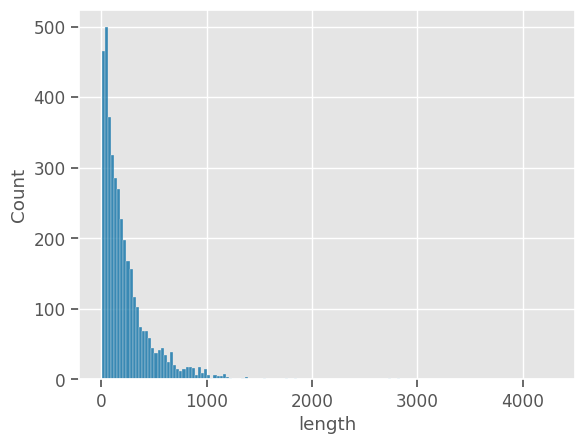

In [16]:
sns.histplot(data=df, x='length')

In [17]:
df = df.loc[ df['length']<1000]
df

,movie_id,review_id,author_rating,review_text,created_at,target,length
1,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",2016-04-09 02:59:01.116000+00:00,Great,41
3,7443,5f0c53a013a32000357ec505,8.0,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came out in 2000. Despite a pretty simple feel to the fi...",2020-07-13 12:29:20.853000+00:00,Great,135
5,955,56863ac592514132db01c0f5,5.0,This is a decent enough mindless action movie with a lot of over the top action but it is not really a Mission Impossible movie. The movie starts of reasonably well being somewhat intelligent with a bit of Mission Impossible feel to it. It is act...,2016-01-01 08:37:25.082000+00:00,Bad,340
6,955,57b2d23dc3a36837d7000b14,3.0,"The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully...",2016-08-16 08:43:41.296000+00:00,Bad,120
7,955,5e9120963679a10018375490,2.0,After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf...,2020-04-11 01:42:46.016000+00:00,Bad,94
...,...,...,...,...,...,...,...
7598,453395,62bc1a2b7304b523856b7f96,5.0,"Obviously this film came loaded with the usual great special effects and endless battle scenes that I guess are needed to draw and hold your average superhero movie fan. Not so much of the Marvel wit and humor that are more like to hold me, the a...",2022-06-29 09:23:55.531000+00:00,Bad,319
7600,453395,62bdf88cc6006d0051490100,8.0,"Dr. Strange explores the multiverse even further than Spider-Man: No Way Home. It was extremely entertaining, and Sam Raimi brought a good amount of horror to the MCU, even though I would have preferred slightly more. Both Dr. Strange and Scarlet...",2022-06-30 19:25:00.442000+00:00,Great,100
7602,453395,62d04dc56d9fe809442a19cc,1.0,"First of all, let me say that I enjoyed the first Doctor Strange along with many other projects Benedict was involved in, but this one removed all the sanity and introduced horrific and woke garbage that simply destroyed this movie for me. Someho...",2022-07-14 17:09:25.916000+00:00,Bad,155
7607,453395,6363785bd75bd6007e7212f5,9.0,I really like Doctor Strange and i really liked the first Doctor Strange movie. So of course I was worried that Marvel being Marvel would screw this one up with their usual woke nonsense or just a substandard Hollywood writer hack script as they ...,2022-11-03 08:14:19.888000+00:00,Great,267


In [18]:
# (df['length']<1000).value_counts()

In [19]:
df['target'].value_counts(1)

Great    0.567037
Bad      0.432963
Name: target, dtype: float64

## Define Target/Groups

In [20]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser','ner'])


In [21]:

def batch_preprocess_texts(
	texts,
	nlp=None,
	remove_stopwords=True,
	remove_punct=True,
	use_lemmas=False,
	disable=["ner"],
	batch_size=50,
	n_process=-1,
):
	"""Efficiently preprocess a collection of texts using nlp.pipe()

	Args:
		texts (collection of strings): collection of texts to process (e.g. df['text'])
		nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None; if None, it creates a default 'en_core_web_sm' pipe.
		remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
		remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
		use_lemmas (bool, optional): lemmatize tokens. Defaults to False.
		disable (list of strings, optional): named pipeline elements to disable. Defaults to ["ner"]: Used with nlp.pipe(disable=disable)
		batch_size (int, optional): Number of texts to process in a batch. Defaults to 50.
		n_process (int, optional): Number of CPU processors to use. Defaults to -1 (meaning all CPU cores).

	Returns:
		list of tokens
	"""
	# from tqdm.notebook import tqdm
	from tqdm import tqdm

	if nlp is None:
		nlp = spacy.load("en_core_web_sm")

	processed_texts = []

	for doc in tqdm(nlp.pipe(texts, disable=disable, batch_size=batch_size, n_process=n_process)):
		tokens = []
		for token in doc:
			# Check if should remove stopwords and if token is stopword
			if (remove_stopwords == True) and (token.is_stop == True):
				# Continue the loop with the next token
				continue

			# Check if should remove stopwords and if token is stopword
			if (remove_punct == True) and (token.is_punct == True):
				continue
                
			# Check if should remove stopwords and if token is stopword
			if (remove_punct == True) and (token.is_space == True):
				continue

			## Determine final form of output list of tokens/lemmas
			if use_lemmas:
				tokens.append(token.lemma_.lower())
			else:
				tokens.append(token.text.lower())

		processed_texts.append(tokens)
	return processed_texts


In [22]:
%%time
df = df.copy()
df['tokens-dirty'] = batch_preprocess_texts(df['review_text'],
                                            remove_stopwords=False, 
                                            remove_punct=True, 
                                            use_lemmas=False)
df['tokens'] = batch_preprocess_texts(df['review_text'],
                                      remove_stopwords=True,
                                      remove_punct=True,
                                     use_lemmas=False)
df['lemmas'] =  batch_preprocess_texts(df['review_text'],remove_stopwords=True, remove_punct=True, use_lemmas=True)

3871it [00:42, 90.61it/s] 
3871it [00:43, 88.96it/s] 
3871it [00:43, 89.74it/s] 

CPU times: user 17.2 s, sys: 3.52 s, total: 20.7 s
Wall time: 2min 10s


In [23]:
## Make string versions of processed text
df['tokens-dirty-combined'] = df['tokens-dirty'].map(lambda x:" ".join(x))
df['tokens-combined'] = df['tokens'].map(lambda x:" ".join(x))
df['lemmas-combined'] = df['lemmas'].map(lambda x:" ".join(x))
df.head()

,movie_id,review_id,author_rating,review_text,created_at,target,length,tokens-dirty,tokens,lemmas,tokens-dirty-combined,tokens-combined,lemmas-combined
1,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",2016-04-09 02:59:01.116000+00:00,Great,41,"[a, guilty, pleasure, for, me, personally, as, i, love, both, the, great, escape, and, most, of, the, works, i, have, seen, over, the, years, from, this, rightfully, esteemed, british, animation, company, highly, recommended, both, for, children,...","[guilty, pleasure, personally, love, great, escape, works, seen, years, rightfully, esteemed, british, animation, company, highly, recommended, children, adults, enjoy, animation]","[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]",a guilty pleasure for me personally as i love both the great escape and most of the works i have seen over the years from this rightfully esteemed british animation company highly recommended both for children and for adults who enjoy animation,guilty pleasure personally love great escape works seen years rightfully esteemed british animation company highly recommended children adults enjoy animation,guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation
3,7443,5f0c53a013a32000357ec505,8.0,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came out in 2000. Despite a pretty simple feel to the fi...",2020-07-13 12:29:20.853000+00:00,Great,135,"[a, very, good, stop, motion, animation, <, em>'chicken, run'</em, >, which, i, watched, a, crap, tonne, when, i, was, little, but, not, for, a, vast, number, of, years, now, is, an, impressive, production, given, it, came, out, in, 2000, despite...","[good, stop, motion, animation, <, em>'chicken, run'</em, >, watched, crap, tonne, little, vast, number, years, impressive, production, given, came, 2000, despite, pretty, simple, feel, film, developed, concept, admittedly, short, run, time, trul...","[good, stop, motion, animation, <, em>'chicken, run'</em, >, watch, crap, tonne, little, vast, number, year, impressive, production, give, come, 2000, despite, pretty, simple, feel, film, develop, concept, admittedly, short, run, time, truly, fly...",a very good stop motion animation < em>'chicken run'</em > which i watched a crap tonne when i was little but not for a vast number of years now is an impressive production given it came out in 2000 despite a pretty simple feel to the film it 's ...,good stop motion animation < em>'chicken run'</em > watched crap tonne little vast number years impressive production given came 2000 despite pretty simple feel film developed concept admittedly short run time truly flies course looks relatively ...,good stop motion animation < em>'chicken run'</em > watch crap tonne little vast number year impressive production give come 2000 despite pretty simple feel film develop concept admittedly short run time truly fly course look relatively terrific ...
5,955,56863ac592514132db01c0f5,5.0,This is a decent enough mindless action movie with a lot of over the top action but it is not really a Mission Impossible movie. The movie starts of reasonably well being somewhat intelligent with a bit of Mission Impossible feel to it. It is act...,2016-01-01 08:37:25.082000+00:00,Bad,340,"[this, is, a, decent, enough, mindless, action, movie, with, a, lot, of, over, the, top, action, but, it, is, not, really, a, mission, impossible, movie, the, movie, starts, of, reasonably, well, b

### Group EDA

In [24]:
# Save the joined text and list of tokens for each group
GROUP_TEXTS = {}

for class_ in df['target'].unique():
    # Isolate group
    group_rows = df.loc[ df['target']==class_]
    # Join reviews 
    text = "\n".join(group_rows['review_text'])
    
    # Combine columns of lists into 1 list
    tokens = group_rows['tokens'].sum()

    dirty_tokens = group_rows['tokens-dirty'].sum()
    # Save text and tokens for group
    GROUP_TEXTS[class_] = dict(text=text, tokens=tokens, tokens_dirty=dirty_tokens)
    
GROUP_TEXTS.keys()

dict_keys(['Great', 'Bad'])

In [25]:
# GROUP_TEXTS['OK']['tokens']

In [26]:
from nltk.probability import FreqDist

# freq_poe = FreqDist()
# freq_poe.most_common(25)

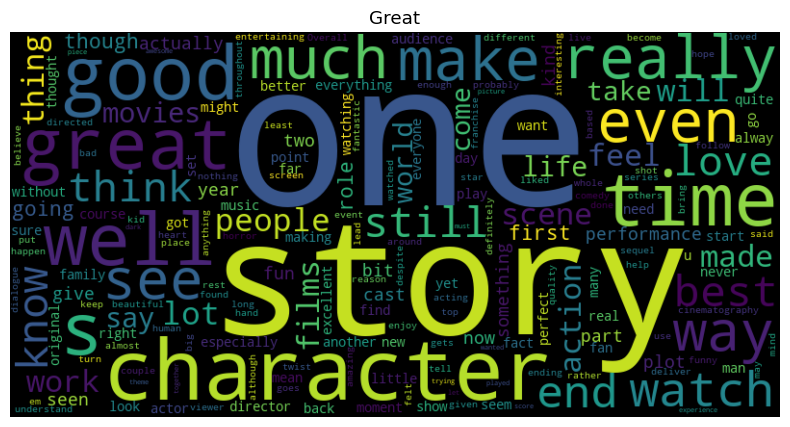

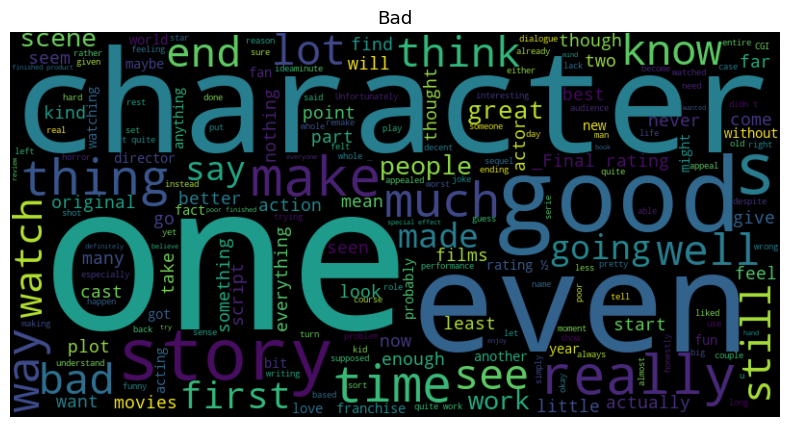

In [27]:
from wordcloud import WordCloud, STOPWORDS
custom_stopwords = [ *STOPWORDS,'movie','film']


for group_name, group_docs in GROUP_TEXTS.items():
    
# for chapter_name, chapter_text in Alice.items():
# for author_name in df['author'].unique():
    # author_text = "\n\n".join(df.loc[df['author']==author_name, 'text'])
    # group_texts = "\n\n".join(group_docs['tokens'])
    group_texts = group_docs['text']
    wordcloud = WordCloud(width=800, height=400, 
                          collocation_threshold=10,#colormap='Greens',
                          stopwords=custom_stopwords,
                     ).generate(group_texts)
    
    # Display the generated image
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(group_name)
    ax.axis("off")
    plt.show()

In [28]:
for group, docs in GROUP_TEXTS.items():
    print(f"\n- {group}")
    freq = FreqDist(docs['tokens'])
    display(freq.most_common(25))
    # ax= freq.plot(25)
    # ax.set_title(group)
    # fig = ax.get_figure()
    # fig.show()


- Great


[('film', 3513),
 ('movie', 3306),
 ('like', 1845),
 ('story', 1621),
 ('good', 1286),
 ('great', 1147),
 ('time', 1121),
 ('best', 847),
 ('watch', 843),
 ('character', 826),
 ('action', 817),
 ('way', 755),
 ('characters', 741),
 ('films', 696),
 ('movies', 691),
 ('life', 615),
 ('people', 602),
 ('cast', 568),
 ('world', 547),
 ('love', 546),
 ('man', 520),
 ('think', 515),
 ('end', 502),
 ('know', 487),
 ('new', 478)]


- Bad


[('movie', 2290),
 ('film', 2152),
 ('like', 1408),
 ('good', 985),
 ('story', 798),
 ('time', 641),
 ('bad', 583),
 ('★', 550),
 ('way', 493),
 ('character', 484),
 ('action', 483),
 ('characters', 453),
 ('know', 437),
 ('watch', 430),
 ('plot', 428),
 ('work', 425),
 ('better', 419),
 ('movies', 412),
 ('lot', 408),
 ('people', 402),
 ('films', 397),
 ('final', 382),
 ('great', 380),
 ('think', 368),
 ('things', 347)]

In [29]:
for group, docs in GROUP_TEXTS.items():
    print(f"\n- {group}")
    ngram_df = get_ngram_measures_finder(docs['tokens'], ngrams=3, top_n=25)
    display(ngram_df)


- Great


,Words,Raw Freq
0,"(★, ★, ★)",0.000455
1,"(watch, watch, recommend)",0.000144
2,"(final, rating, ★)",0.000136
3,"(rating, ★, ★)",0.000136
4,"(great, watch, watch)",0.000127
5,"(=, =, =)",0.000122
6,"(review, <, >)",0.000118
7,"(appeal, personal, favourite)",0.000114
8,"(strong, appeal, personal)",0.000114
9,"(★, strong, appeal)",0.000114



- Bad


,Words,Raw Freq
0,"(final, rating:, ★)",0.001209
1,"(final, rating, ★)",0.000883
2,"(★, ★, ½)",0.000869
3,"(rating:, ★, ★)",0.000820
4,"(rating, ★, ★)",0.000799
5,"(lot, appealed, work)",0.000737
6,"(½, lot, appealed)",0.000737
7,"(★, ½, lot)",0.000737
8,"(appeal, poor, finished)",0.000639
9,"(poor, finished, product)",0.000639


## Modeling

In [30]:
from sklearn.feature_extraction.text import (
    ENGLISH_STOP_WORDS,
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)

In [31]:
X = df['review_text']#.astype(str)
y = df['target']#.astype(int)
y.value_counts(1)

Great    0.567037
Bad      0.432963
Name: target, dtype: float64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=321)
X_train.head()

3451    Is there any excuse available that will justify spending 2 hours, 45 minutes to watch this film?  Or why I am gifting it three stars?\r\n\r\nIt was a free rental at Redox.\r\nI normally enjoy Mark Wahlberg movies.\r\nI love Bumblebee.  \r\n\r\nDo...
134     In the quiet words of the Virgin Mary... come again?\r\n\r\nSnatch seems to be one of those spunky British gangster films that critics are divided on, yet it's loved by the target audience. Guy Ritchie has done a Sam Raimi, he has remade the firs...
1778    'Friday the 13th' turned out to be one of the biggest disappointments when it comes to horror classics remakes. After watching the trailers, I got the wrong idea that this film was going to be more serious. The previews gave me the false impressi...
4288    **A new kid on the block with the superpower.**\r\n\r\nI am not saying the film was terrible, but the timing was bad. There are loads of great sci-fi films were made recently and still coming out. So to compete with th

In [33]:
vectorizer = CountVectorizer(stop_words=None,
    ngram_range=(1,2))

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_train_vec

<2903x274357 sparse matrix of type '<class 'numpy.int64'>'
	with 904736 stored elements in Compressed Sparse Row format>

In [34]:
# Saves vocab - matches number of columns above
vocab_dict = vectorizer.vocabulary_
len(vocab_dict)

274357

In [35]:
# Words are now the feature_names
feature_names = vectorizer.get_feature_names_out()
len(feature_names)

274357

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00      1260
       Great       1.00      1.00      1.00      1643

    accuracy                           1.00      2903
   macro avg       1.00      1.00      1.00      2903
weighted avg       1.00      1.00      1.00      2903



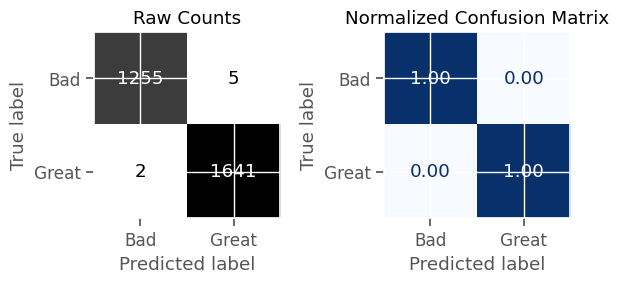


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         Bad       0.98      0.52      0.68       416
       Great       0.73      0.99      0.84       552

    accuracy                           0.79       968
   macro avg       0.86      0.76      0.76       968
weighted avg       0.84      0.79      0.78       968



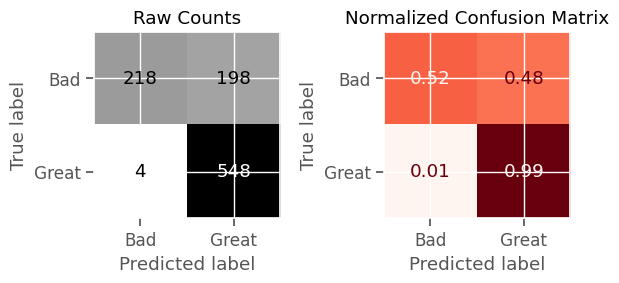

In [36]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)
evaluate_classification(clf, X_train_vec,y_train, X_test_vec, y_test)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00      1260
       Great       1.00      1.00      1.00      1643

    accuracy                           1.00      2903
   macro avg       1.00      1.00      1.00      2903
weighted avg       1.00      1.00      1.00      2903



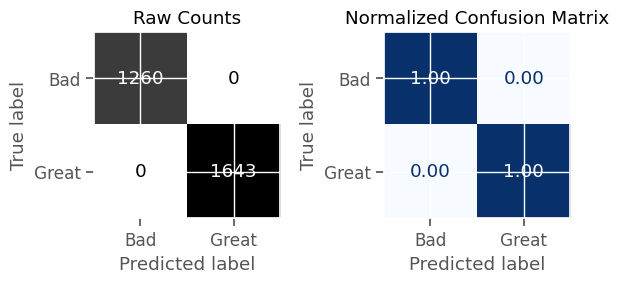


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         Bad       0.93      0.62      0.75       416
       Great       0.77      0.96      0.86       552

    accuracy                           0.82       968
   macro avg       0.85      0.79      0.80       968
weighted avg       0.84      0.82      0.81       968



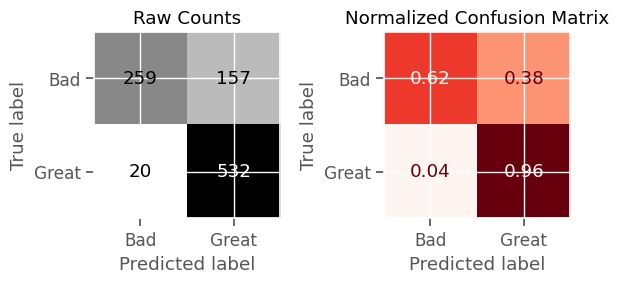

In [37]:

clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train_vec, y_train)
evaluate_classification(clf, X_train_vec,y_train, X_test_vec, y_test)

# Deep NLP

In [38]:
from sklearn.preprocessing import LabelEncoder

### Preparing Tensorflow Dataset Objects

In [39]:
# Define X and y
X = df['review_text']
y_string= df['target']

# Instantiate the LabelEncoder
encoder = LabelEncoder()

# Fit and Transform the strings into integers
y = pd.Series(encoder.fit_transform(y_string))
y.value_counts()

1    2195
0    1676
dtype: int64

In [40]:
encoder.inverse_transform(y.unique())

array(['Great', 'Bad'], dtype=object)

In [41]:
# Convert to Dataset Object
ds = tf.data.Dataset.from_tensor_slices((X, y))
# Shuffle dataset
ds = ds.shuffle(buffer_size=len(ds),reshuffle_each_iteration=False)

In [42]:
# Set the ratio of the train, validation, test split
split_train = .7
split_val =  .2
split_test =  1 -( split_train + split_val )
# Calculate the number of samples for training and validation data 
n_train_samples =  int(len(ds) * split_train)
n_val_samples = int(len(ds) * split_val)
n_test_samples = len(ds) -(n_train_samples + n_val_samples)
# Set the batch size
BATCH_SIZE =32
import math
# math.ceil will round up
# How many batches? 
n_train_batches = math.ceil(n_train_samples/BATCH_SIZE)
n_val_batches = math.ceil(n_val_samples/BATCH_SIZE)
n_test_batches = math.ceil(n_test_samples/BATCH_SIZE)
print(f"    - train:\t{n_train_samples} samples \t({n_train_batches} batches)")
print(f"    - val:  \t{n_val_samples} samples \t({n_val_batches} batches)")
print(f"    - test: \t{n_test_samples} samples \t({n_test_batches} batches)")



    - train:	2709 samples 	(85 batches)
    - val:  	774 samples 	(25 batches)
    - test: 	388 samples 	(13 batches)


In [43]:
# Use take and skip to define each set
train_ds = ds.take(n_train_samples).batch(batch_size=BATCH_SIZE)
# Skip over the training batches and take the validation batches
val_ds = ds.skip(n_train_samples).take(n_val_samples).batch(batch_size=BATCH_SIZE)
# Skipver the train and validation batches, the remaining are the test batches
test_ds = ds.skip(n_train_samples + n_val_samples).batch(batch_size=BATCH_SIZE)
# Confirm the number of batches in each
print (f' There are {len(train_ds)} training batches.')
print (f' There are {len(val_ds)} validation batches.')
print (f' There are {len(test_ds)} testing batches.')



 There are 85 training batches.
 There are 25 validation batches.
 There are 13 testing batches.


In [44]:
# taking a sample 
example_X, example_y= train_ds.take(1).get_single_element()
print(example_X)
print(example_y)

tf.Tensor(
[b"> Jumping back into the pool where you have almost drowned once.\r\n\r\nI think it was Andrew Garfield's recent best performance. Because he hasn't done any films lately since 'The Amazing Spider-Man 2' critically failed. His role was awesome, but a struggling young single father. When he loses his inherited family house to the bank, he has no choice but to make a quick decision that can secure his family a roof over the head. But when the things get ugly, the new issues begin to appear, and with a narrow chance he tries to fix it.\r\n\r\nAnother excellent character in the movie that played by Michael Shannon. Not like you know this story very well, and wonderfully narrated story on the screen about what a desperate man can do with his small opportunity to rise again. You will know the twist is coming, but when and how is what we have to patiently wait for. I almost liked the entire film, except the end, which was a bit weak solution and stronger in the display.\r\n\r\n8/

In [45]:
# Create the TextVectorization layer
count_vectorizer = tf.keras.layers.TextVectorization(
    standardize="lower_and_strip_punctuation",
    output_mode="count"
)

In [46]:
def make_text_vectorization_layer(train_ds,  max_tokens=None, 
                                  split='whitespace',
                                  standardize="lower_and_strip_punctuation",
                                  output_mode="int",
                                  output_sequence_length=None,
                                  ngrams=None, pad_to_max_tokens=False,
                                  verbose=True,
                                  **kwargs,
                                 ):


    # Build the text vectorization layer
    text_vectorizer = tf.keras.layers.TextVectorization(
        max_tokens=max_tokens,
        standardize=standardize, 
        output_mode=output_mode,
        output_sequence_length=output_sequence_length,
        **kwargs
    )

    # Get just the text from the training data
    if isinstance(train_ds, (np.ndarray, list, tuple, pd.Series)):
        ds_texts = train_ds
    else:
        try:
            ds_texts = train_ds.map(lambda x, y: x )
        except:
            ds_texts = train_ds
            
    # Fit the layer on the training texts
    text_vectorizer.adapt(ds_texts)
    
    
    if verbose:
        # Print the params
        print( "\ntf.keras.layers.TextVectorization(" )
        config = text_vectorizer.get_config()
        pprint(config,indent=4)
        print(")")
               
    # SAVING VOCAB FOR LATER
    # Getting list of vocab 
    vocab = text_vectorizer.get_vocabulary()
    # Save dictionaries to look up words from ints 
    int_to_str  = {idx:word for idx, word in enumerate(vocab)}
    
    return text_vectorizer, int_to_str



<Axes: xlabel='sequence_length', ylabel='Count'>

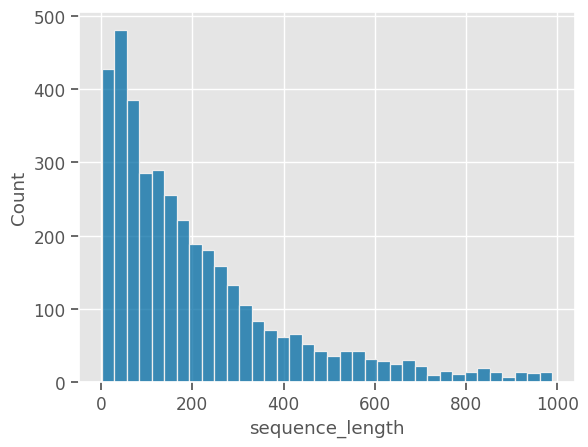

In [47]:
df['sequence_length'] = df['review_text'].map( lambda x: len(x.split(" ")))
# filter_short = df['sequence_length']< 400
sns.histplot(df['sequence_length'])

In [48]:
# Define sequence length as a variable for future use
SEQUENCE_LENGTH = 400
# Define vectorizer layer. Use the custom function to build and fit the vectorizer before using it in model
sequence_vectorizer, vocab_lookup = make_text_vectorization_layer(train_ds, 
                                                                  output_mode='int', 
                                                                  output_sequence_length = SEQUENCE_LENGTH, 
                                                                  verbose=True)

2023-11-22 22:38:38.718025: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz



tf.keras.layers.TextVectorization(
{   'batch_input_shape': (None,),
    'dtype': 'string',
    'encoding': 'utf-8',
    'idf_weights': None,
    'max_tokens': None,
    'name': 'text_vectorization_1',
    'ngrams': None,
    'output_mode': 'int',
    'output_sequence_length': 400,
    'pad_to_max_tokens': False,
    'ragged': False,
    'sparse': False,
    'split': 'whitespace',
    'standardize': 'lower_and_strip_punctuation',
    'trainable': True,
    'vocabulary': None,
    'vocabulary_size': 29944}
)


## Sequence Models

In [49]:
# Define a function for building an LSTM model
from tensorflow.keras import layers, optimizers, regularizers
from tensorflow.keras.models import Sequential


def build_lstm_model(text_vectorization_layer):
    VOCAB_SIZE = text_vectorization_layer.vocabulary_size()

    # Define sequential model with pre-trained vectorization layer and *new* embedding layer
    lstm_model = Sequential(
        [
            text_vectorization_layer,
            layers.Embedding(
                input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=SEQUENCE_LENGTH
            ),
        ]
    )

    # Add *new* LSTM layer
    lstm_model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
    lstm_model.add(layers.Dropout(0.3))
    lstm_model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
    lstm_model.add(layers.GlobalMaxPooling1D())

    # Add output layer
    lstm_model.add(layers.Dense(len(classes), activation="softmax"))

    # Compile the model
    lr_schedule = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.95
    )  # 0.9)
    optimizer = optimizers.legacy.Adam(learning_rate=lr_schedule)
    lstm_model.compile(
        optimizer=optimizer,  #'adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    lstm_model.summary()
    return lstm_model

In [50]:
# # Code below is from CNN Week
# def get_callbacks(patience=3, monitor='val_accuracy'):
#     early_stop = tf.keras.callbacks.EarlyStopping(patience=patience, monitor=monitor, verbose=True)
#     return [early_stop]


### Call backs
def get_callbacks(monitor='val_accuracy',patience=3, restore_best_weights=True,
                  start_from_epoch=0,baseline_value=None,
                  verbose_early_stopping=1,  
                  tensborboard=True, logdir="/tmp/tb_logs",
                 tb_embed_freq=0, tb_write_images = False, tb_hist_freq = 0):

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=patience, #mode=mode, 
                                                      restore_best_weights=restore_best_weights,
                                                      baseline=baseline_value,
                                                      start_from_epoch=start_from_epoch,
                                                      verbose=verbose_early_stopping)

    if tensborboard:
        tboard = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=tb_hist_freq,write_images=tb_write_images,
                                                embeddings_freq=tb_embed_freq,)
        return [ early_stopping, tboard]
    else:
        return [early_stopping]

In [51]:
EMBED_DIM = 100
classes = y_train.unique()
# Build the lstm model and specify the vectorizer
lstm_model = build_lstm_model(sequence_vectorizer)

# Defien number of epocs
EPOCHS = 30

# Fit the model
history = lstm_model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks(),
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 400)              0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 400, 100)          2994400   
                                                                 
 bidirectional (Bidirectiona  (None, 400, 128)         84480     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 400, 128)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 400, 128)         98816     
 nal)                                                            
                                                        

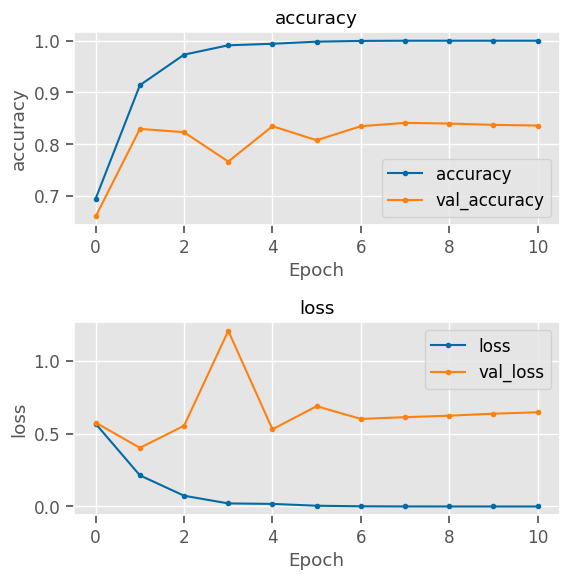


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1179
           1       1.00      1.00      1.00      1530

    accuracy                           1.00      2709
   macro avg       1.00      1.00      1.00      2709
weighted avg       1.00      1.00      1.00      2709



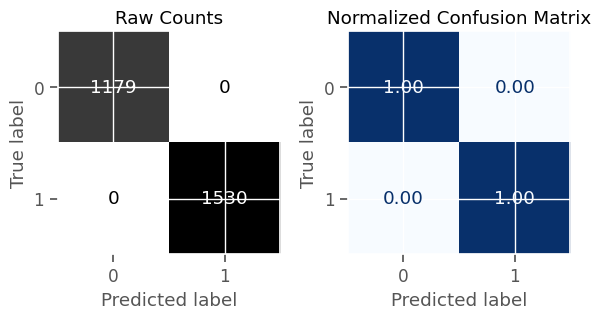


- Evaluating Training Data:
85/85 [==============================] - 6s 75ms/step - loss: 1.9072e-04 - accuracy: 1.0000
{'loss': 0.00019071770657319576, 'accuracy': 1.0}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       180
           1       0.84      0.86      0.85       208

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



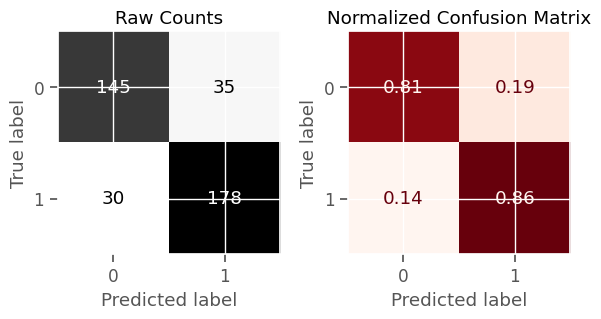


- Evaluating Test Data:
13/13 [==============================] - 1s 69ms/step - loss: 0.5612 - accuracy: 0.8325
{'loss': 0.5611892342567444, 'accuracy': 0.8324742317199707}


In [52]:
# Obtain the results
results = evaluate_classification_network(
    lstm_model, X_train=train_ds, 
    X_test=test_ds, history=history
);

### Attention Models

In [53]:
from tensorflow.keras import optimizers
from tensorflow.keras import Model, Input


def build_transformer_model(text_vectorization_layer):
    """ Need to use the Function API for Attention"""
    
    MAX_TOKENS = text_vectorization_layer.vocabulary_size()
    
    input_layer = Input(shape=(SEQUENCE_LENGTH,),dtype=tf.string)
    flattened_input = tf.reshape(input_layer, (-1,))
    vectorizer_layer = text_vectorization_layer(flattened_input)
    
    embed_layer = tf.keras.layers.Embedding(input_dim=MAX_TOKENS, 
                                            output_dim=EMBED_DIM, 
                                            input_length=SEQUENCE_LENGTH)(vectorizer_layer)

    # 10/19/23: had num_heads =128, key_dim=120
    attention_layer = layers.MultiHeadAttention(num_heads=8, key_dim=50, value_dim=EMBED_DIM, dropout=0.1)(embed_layer, embed_layer,embed_layer)
    flatten_layer = layers.Flatten()(attention_layer)
    dense_layer =  layers.Dense(64, activation='relu')(flatten_layer)
    output_layer = layers.Dense(3, activation='softmax')(dense_layer)
    model = Model(inputs=input_layer, outputs=output_layer)


    
    lr_schedule = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01,
        decay_steps=10000,
        decay_rate=0.9)
    optimizer = optimizers.legacy.Adam(learning_rate=lr_schedule)

    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
%%time

MAX_TOKENS = None  # 20_000  # Max Vocab
SEQUENCE_LENGTH = 400 #200 # Max Lenght of texts
EMBED_DIM = 200  # dimensions for Embedding layer
BATCH_SIZE_SEQ = 32


# # # Making datasets
# train_ds, val_ds, test_ds = train_val_test_datasets(
#     X, y, BATCH_SIZE=BATCH_SIZE_SEQ, verbose=True, show_class_balance=True
# )  # , show_class_balance=True)

## Make vectorizer
seq_vectorizer, int_to_str = make_text_vectorization_layer( # accepts all args of TextVectorization layer
    train_ds, # training texts
    max_tokens=MAX_TOKENS,
    standardize="lower_and_strip_punctuation",
    output_mode="int",
    output_sequence_length=SEQUENCE_LENGTH,
    verbose=True,
)




## Fit and evaluate model
EPOCHS = 100
model = build_transformer_model(seq_vectorizer)
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    # class_weight=class_weights_dict,
    callbacks=get_callbacks()#start_from_epoch=2, patience=2, monitor='val_loss', mode='min',logdir="/tmp/tb_logs_attention"),
)
evaluate_classification_network(
    model, #X_train=train_ds, 
    X_test=test_ds, history=history
);


tf.keras.layers.TextVectorization(
{   'batch_input_shape': (None,),
    'dtype': 'string',
    'encoding': 'utf-8',
    'idf_weights': None,
    'max_tokens': None,
    'name': 'text_vectorization_2',
    'ngrams': None,
    'output_mode': 'int',
    'output_sequence_length': 400,
    'pad_to_max_tokens': False,
    'ragged': False,
    'sparse': False,
    'split': 'whitespace',
    'standardize': 'lower_and_strip_punctuation',
    'trainable': True,
    'vocabulary': None,
    'vocabulary_size': 29944}
)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400)]        0           []                               
                                                                                                  
 tf.reshape (TFOpLambda)        (None,)              0           ['input_1[